### 3'UTR analysis
The three prime untranslated region (3'-UTR) is the section of messenger RNA (mRNA) that immediately follows the translation termination codon. The 3'-UTR often contains regulatory regions that post-transcriptionally influence gene expression, such as [microRNA (miRNA)](https://en.wikipedia.org/wiki/MicroRNA) binding sites.
![](figures/640px-MRNA_structure.svg.png)
(Adapted from Wikipedia: https://en.wikipedia.org/wiki/Three_prime_untranslated_region)

We start by importing the necessary packages

In [1]:
import os #directories package
import pandas as pd #pandas package similar to R dataframe
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install progressbar
from progressbar import ProgressBar

Set up here where the 3'UTR and miRNA data are located in your local directory

In [3]:
#Change current directory in Python
os.chdir("/Users/bofillderosf/biof309_xbdr86_utr/")
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/bofillderosf/biof309_xbdr86_utr


Load the 3'UTR sequences

In [4]:
utr = pd.read_csv('mini_UTR_set.tsv', sep='\t', names = ["Gene", "Sequence"])
utr.head(n=4)

,Gene,Sequence
0,CCDC73,GGGGAUUGGUGUUUUUGGGAAUAAAAUGUGACAUUUAUAGUGAAAA...
1,NIPAL3,GACUCGCCUCCCUCUAUUUAUAACUGUCCCCUCCAGGCUGACAGUG...
2,AKR1B1,AGCUGUGGUUGCCUGCUCGUCCCCAAGUGACCUAUACCUGUGUUUC...
3,CTD-2330K9.3,UCUGGGGAUUUUCUAGGCCCCCAGUCCCAUCCAUCAGGACAAUCAA...


In [5]:
mirna = pd.read_csv('miRNA_target_seed.tsv', sep='\t')
mirna = mirna.sample(n=100, random_state=86)
mirna.head(n=4)

,SEED,rev_compl
88,CGTGTCT,AGACACG
84,TGAATTA,UAAUUCA
328,GCGCCTG,CAGGCGC
161,TGGCCAT,AUGGCCA


The analysis performed is the mapping of miRNA seed sites, where miRNA bind by base-pair complementarity

In [6]:
#define motif
import re
# importing module for regex 
utr["Len_UTR"]= utr["Sequence"].str.len()/1000
utr.head(n=4)

,Gene,Sequence,Len_UTR
0,CCDC73,GGGGAUUGGUGUUUUUGGGAAUAAAAUGUGACAUUUAUAGUGAAAA...,3.627
1,NIPAL3,GACUCGCCUCCCUCUAUUUAUAACUGUCCCCUCCAGGCUGACAGUG...,3.798
2,AKR1B1,AGCUGUGGUUGCCUGCUCGUCCCCAAGUGACCUAUACCUGUGUUUC...,0.941
3,CTD-2330K9.3,UCUGGGGAUUUUCUAGGCCCCCAGUCCCAUCCAUCAGGACAAUCAA...,0.324


In [8]:
motifs = mirna['rev_compl']
pbar = ProgressBar() #progress bar not to get impatient with the miRNA site search
for motif in pbar(motifs):
    search = utr["Sequence"].str.count(motif, re.I)
    utr[motif] = search
utr.head(n=4)

100% |########################################################################|


,Gene,Sequence,Len_UTR,AGACACG,UAAUUCA,CAGGCGC,AUGGCCA,AAGGGCU,GAGACGG,AUGUUUC,...,GCUGAUU,GUUACAU,GACACAA,CAGGGCA,CGGUACG,CUAUCUU,AGCAAUA,GUACAGG,CUGGGGG,GCUCCCC
0,CCDC73,GGGGAUUGGUGUUUUUGGGAAUAAAAUGUGACAUUUAUAGUGAAAA...,3.627,0,2,0,1,1,0,0,...,1,1,0,0,0,0,1,0,0,0
1,NIPAL3,GACUCGCCUCCCUCUAUUUAUAACUGUCCCCUCCAGGCUGACAGUG...,3.798,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AKR1B1,AGCUGUGGUUGCCUGCUCGUCCCCAAGUGACCUAUACCUGUGUUUC...,0.941,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,CTD-2330K9.3,UCUGGGGAUUUUCUAGGCCCCCAGUCCCAUCCAUCAGGACAAUCAA...,0.324,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Maximums in each variable:


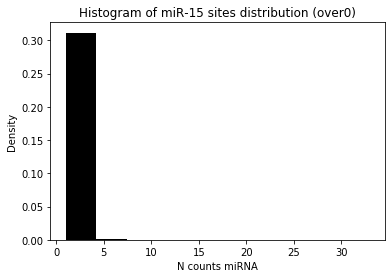

In [11]:
#print("Maximums in each variable:")
#print(utr.max(axis=0))
frequencies = utr.UGCUGCU

plt.hist(frequencies, density=True, range=(1, frequencies.max()),color='black') #avoid plot UTRs with 0 counts
plt.title("Histogram of miR-15 sites distribution (over0)")
plt.ylabel('Density')
plt.xlabel('N counts miRNA')
plt.show()

## t-SNE implementation to detect 3'UTRs with similar miRNA regulation 

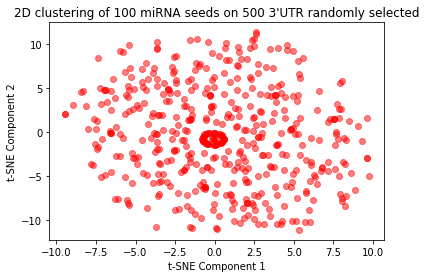

In [20]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50) 

#Subset data miRNA sites
all_samples = utr.iloc[:, 3:]
subset_samples = all_samples.sample(n=500, random_state=86)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(subset_samples)

# Select component 1
xs = tsne_features[:,0]

# Select component 2
ys = tsne_features[:,1]

# Scatter plot by component 1 and 2
plt.scatter(xs, ys, alpha=0.5, color="red") 
plt.title("2D clustering of 100 miRNA seeds on 500 3'UTR randomly selected")
plt.ylabel('t-SNE Component 2')
plt.xlabel('t-SNE Component 1')
plt.show()